# Data and the current economy
Download data on UK “Labour Productivity” from the website of the Office for National
Statistics (ONS). The correct data should have the name “PRDY"

https://www.ons.gov.uk/employmentandlabourmarket/peopleinwork/labourproductivity/datasets/labourproductivity

### a)

In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

df = pd.read_csv('../data/prdy.csv')
df

,Title,Output per Worker: Whole Economy SA: Index 2019=100: UK,Output per Worker: Whole Economy: % change per annum SA: UK,Output per Worker: Whole Economy: % change quarter on previous quarter SA: UK,Whole Economy index of LFS Employment: SA % change on Q,Whole Economy index of LFS Employment: SA % change on Y,"Output per hour: Ag, forestry and fishing A SIC07, 2019=100, SA, UK","Output per hour: Ag, forestry and fishing A SIC07, % change on Y, SA, UK","Output per hour: Production B-E SIC07, 2019=100, SA, UK","Output per hour: Production B-E SIC07, % change on Q, SA, UK",...,Output per filled job: Whole economy: % change per annum SA: UK,UK Whole Economy: Productivity hours SA: Index 2019 = 100,UK Whole Economy: Output per hour worked SA: Index 2019 = 100,UK Whole Economy: Productivity hours % change per annum SA,UK Whole Economy: Output per hour worked % change per annum SA,Productivity Jobs:Whole Economy: % change quarter on previous quarter SA:UK,UK Whole Economy: Output per hour worked % change quarter on previous quarter SA,UK Whole Economy: Productivity Hours : % change quarter on previous quarter SA,Whole Economy index of LFS Employment: SA 2019=100,Ratio of Whole economy jobs to Whole economy workers: SA
0,CDID,A4YM,A4YN,A4YO,DIW8,DIW9,DJJ9,DJK2,DJK3,DJK4,...,LNNP,LZVA,LZVB,LZVC,LZVD,TXAJ,TXBB,TXBU,TXEL,TXET
1,PreUnit,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,Unit,"Index, base year = 100",%,%,%,%,"Index, base year = 100",%,"Index, base year = 100",%,...,%,"Index, base year = 100","Index, base year = 100",%,%,%,%,%,"Index, base year = 100",NaN
3,Release Date,15-02-2024,15-02-2024,15-02-2024,15-02-2024,15-02-2024,15-02-2024,15-02-2024,15-02-2024,15-02-2024,...,15-02-2024,15-02-2024,15-02-2024,15-02-2024,15-02-2024,15-02-2024,15-02-2024,15-02-2024,15-02-2024,15-02-2024
4,Next release,To be announced,To be announced,To be announced,To be announced,To be announced,To be announced,To be announced,To be announced,To be announced,...,To be announced,To be announced,To be announced,To be announced,To be announced,To be announced,To be announced,To be announced,To be announced,To be announced
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
322,2022 Q3,101.2,1.2,0.0,-0.1,0.7,NaN,NaN,99.1,-2.2,...,1.1,99.1,102.4,1.1,0.8,-0.1,0.4,-0.4,100.3,100.3
323,2022 Q4,100.9,-0.5,-0.3,0.5,1.2,NaN,NaN,98.6,-0.5,...,-0.5,99.4,102.3,1.3,-0.6,0.4,-0.2,0.3,100.7,100.2
324,2023 Q1,100.8,-0.9,-0.1,0.4,1.3,NaN,NaN,99.6,1.0,...,-0.9,100.2,101.7,0.7,-0.3,0.5,-0.5,0.8,101.1,100.3
325,2023 Q2,100.9,-0.3,0.1,-0.1,0.6,NaN,NaN,99.8,0.1,...,-0.1,99.6,102.3,0.1,0.2,-0.4,0.6,-0.6,101.0,100.0


In [4]:
df_2 = pd.concat([df['Title'], df.loc[:, df.iloc[0] == 'LZVB']], axis=1)


df_p = df_2.loc[(df['Title'] >= '1971 Q1') & df['Title'].str.contains('Q')].copy()
df_p.rename(columns={'Title': 'Quarter'}, inplace=True)
df_p

,Quarter,UK Whole Economy: Output per hour worked SA: Index 2019 = 100
116,1971 Q1,42.6
117,1971 Q2,43.4
118,1971 Q3,44.2
119,1971 Q4,44.5
120,1972 Q1,44.2
...,...,...
322,2022 Q3,102.4
323,2022 Q4,102.3
324,2023 Q1,101.7
325,2023 Q2,102.3


In [5]:
df_p['Quarter'] = pd.to_datetime(df_p['Quarter'], format='%Y Q%m')
df_p[df_p.columns[1]] = pd.to_numeric(df_p[df_p.columns[1]])

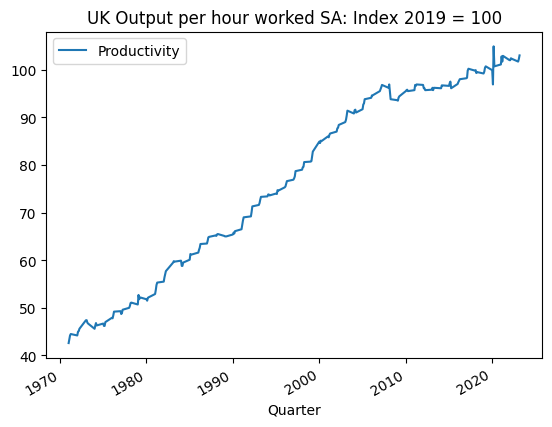

In [6]:
df_p.plot(x='Quarter', y=df_p.columns[1], kind='line', title='UK Output per hour worked SA: Index 2019 = 100')
plt.legend(["Productivity"])
plt.show()

### b)
In 2008, Productivity decreased and stagnated for a few years. Then it increased until the 2020 COVID crisis.

### c)

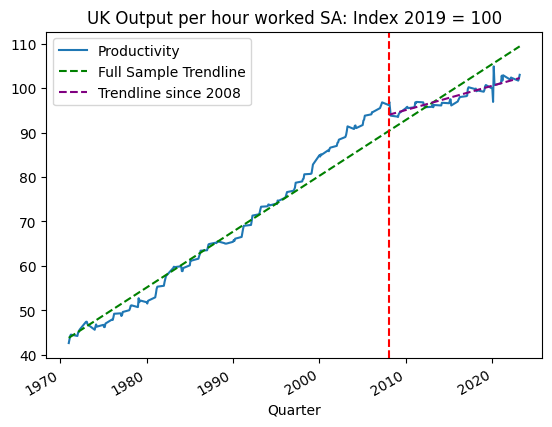

In [12]:
x = df_p['Quarter'].astype(np.int64) // 10**9  # convert datetime to seconds since epoch
y = df_p[df_p.columns[1]]

df_p2008 = df_p[df_p['Quarter'].dt.year >= 2008]
x2 = df_p2008['Quarter'].astype(np.int64) // 10**9
y2 = df_p2008[df_p2008.columns[1]]

coefficients = np.polyfit(x, y, 1)
polynomial = np.poly1d(coefficients)
trendline = polynomial(x)

coefficients2 = np.polyfit(x2, y2, 1)
polynomial2 = np.poly1d(coefficients2)
trendline2 = polynomial2(x2)

# plot
df_p.plot(x='Quarter', y=df_p.columns[1], kind='line', title='UK Output per hour worked SA: Index 2019 = 100')
plt.plot(df_p['Quarter'], trendline, color='green', linestyle='--')  # plot full sample trend line
plt.plot(df_p2008['Quarter'], trendline2, color='purple', linestyle='--')  # plot trend line since 2008
plt.legend(["Productivity", "Full Sample Trendline", "Trendline since 2008"])
plt.axvline(pd.Timestamp('2008'), color='red', linestyle='--')
plt.show()

 We can notice than the productivity grow trend is lower than before the 2008 crisis.
 The graphs are different because the years range is different (1971-2023 for mine and 1997-2015 for UK Government). 

### d)
Labour hoarding or capital misallocation.
According to Martin Weale, there's little evidence that these two are the causes and. In his opinion, if they were the cause, in 2014 the productivity would already have been started growing at the previous level.

### e)

In [8]:
df_3 = pd.concat([df['Title'], df.loc[:, df.iloc[0] == 'A4YM']], axis=1)

df_pw = df_3.loc[(df['Title'] >= '1971 Q1') & df['Title'].str.contains('Q')].copy()
df_pw.rename(columns={'Title': 'Quarter'}, inplace=True)
df_pw

,Quarter,Output per Worker: Whole Economy SA: Index 2019=100: UK
116,1971 Q1,46.7
117,1971 Q2,47.6
118,1971 Q3,48.6
119,1971 Q4,49.0
120,1972 Q1,48.8
...,...,...
322,2022 Q3,101.2
323,2022 Q4,100.9
324,2023 Q1,100.8
325,2023 Q2,100.9


In [9]:
df_pw['Quarter'] = pd.to_datetime(df_pw['Quarter'], format='%Y Q%m')
df_pw[df_pw.columns[1]] = pd.to_numeric(df_pw[df_pw.columns[1]])

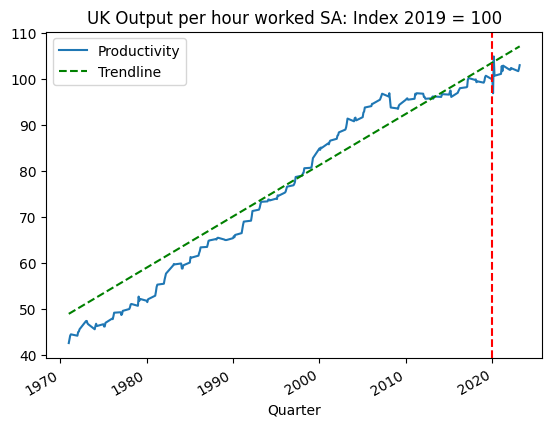

In [10]:
x = df_pw['Quarter'].astype(np.int64) // 10**9  # convert datetime to seconds since epoch
y = df_pw.iloc[:,1]

coefficients = np.polyfit(x, y, 1)
polynomial = np.poly1d(coefficients)
trendline = polynomial(x)

df_p.plot(x='Quarter', y=df_p.columns[1], kind='line', title='UK Output per hour worked SA: Index 2019 = 100')
plt.plot(df_p['Quarter'], trendline, color='green', linestyle='--')  # Plot trend line
plt.legend(["Productivity", "Trendline"])
plt.axvline(pd.Timestamp('2020'), color='red', linestyle='--')
plt.show()

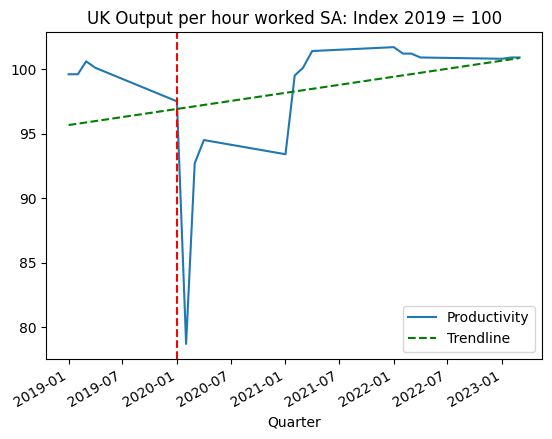

In [11]:
df_pw2 = df_pw[df_pw['Quarter'].dt.year >= 2019]

x = df_pw2['Quarter'].astype(np.int64) // 10**9  # convert datetime to seconds since epoch
y = df_pw2.iloc[:,1]

coefficients = np.polyfit(x, y, 1)
polynomial = np.poly1d(coefficients)
trendline = polynomial(x)

df_pw2.plot(x='Quarter', y=df_pw2.columns[1], kind='line', title='UK Output per hour worked SA: Index 2019 = 100')
plt.plot(df_pw2['Quarter'], trendline, color='green', linestyle='--')  # Plot trend line
plt.legend(["Productivity", "Trendline"])
plt.axvline(pd.Timestamp('2020'), color='red', linestyle='--')
plt.show()

I am not surprised, since the COVID-19 restrictions stopped some work related activities during 2020 Q1. Hence, lot of people stopped producing, even though they were register as workers. As a consequence, the productivity per worker descreased.